# Train a Detection Network

In [7]:
import re
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def plot_on_training(txt, max_epochs=100, max_loss=5):
    loss = re.findall('- loss: \d+\.\d+', txt)
    accuracy = re.findall('- acc: \d+\.\d+', txt)
    val_loss = re.findall('- val_loss: \d+\.\d+', txt)
    val_accuracy = re.findall('- val_acc: \d+\.\d+', txt)

    loss = np.array([float(x[8:]) for x in loss], dtype=np.float32)
    accuracy = np.array([float(x[7:]) for x in accuracy], dtype=np.float32)
    val_loss = np.array([float(x[12:]) for x in val_loss], dtype=np.float32)
    val_accuracy = np.array([float(x[11:]) for x in val_accuracy], dtype=np.float32)
    
    t = np.arange(1, len(val_loss)+1).astype(np.int64)
    fig, ax1 = plt.subplots(figsize=(18, 10), dpi=100)
    ax1.plot(t, loss[392::393], 'b-')
    ax1.plot(t, val_loss, 'b-.')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss', color='b')
    ax1.set_xlim([0,max_epochs])
    ax1.set_ylim([0,max_loss])
    for tl in ax1.get_yticklabels():
        tl.set_color('b')

    ax2 = ax1.twinx()
    ax2.plot(t, accuracy[392::393], 'r-')
    ax2.plot(t, val_accuracy, 'r-.')
    ax2.set_ylabel('Accuracy', color='r')
    ax2.set_xlim([0,max_epochs])
    ax2.set_ylim([0, 1])
    for tl in ax2.get_yticklabels():
        tl.set_color('r')
    plt.show()

# Experiment 1

```
nb_experiment: 1
batch_size: 256
timesteps: 20
epochs: 100
learning rate: 0.0001
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
====================================================================================================
features (InputLayer)            (256, 20, 4096)       0                                            
____________________________________________________________________________________________________
normalization (BatchNormalization(256, 20, 4096)       8192        features[0][0]                   
____________________________________________________________________________________________________
lstm1 (LSTM)                     (256, 20, 512)        9439232     normalization[0][0]              
____________________________________________________________________________________________________
lstm_classification (LSTM)       (256, 512)            2099200     lstm1[0][0]                      
____________________________________________________________________________________________________
lstm_detection (LSTM)            (256, 20, 512)        2099200     lstm1[0][0]                      
____________________________________________________________________________________________________
activity_detection (TimeDistribut(256, 20, 1)          513         lstm_detection[0][0]             
____________________________________________________________________________________________________
class_predictor (Dense)          (256, 201)            103113      lstm_classification[0][0]        
====================================================================================================
Total params: 13749450
____________________________________________________________________________________________________
```

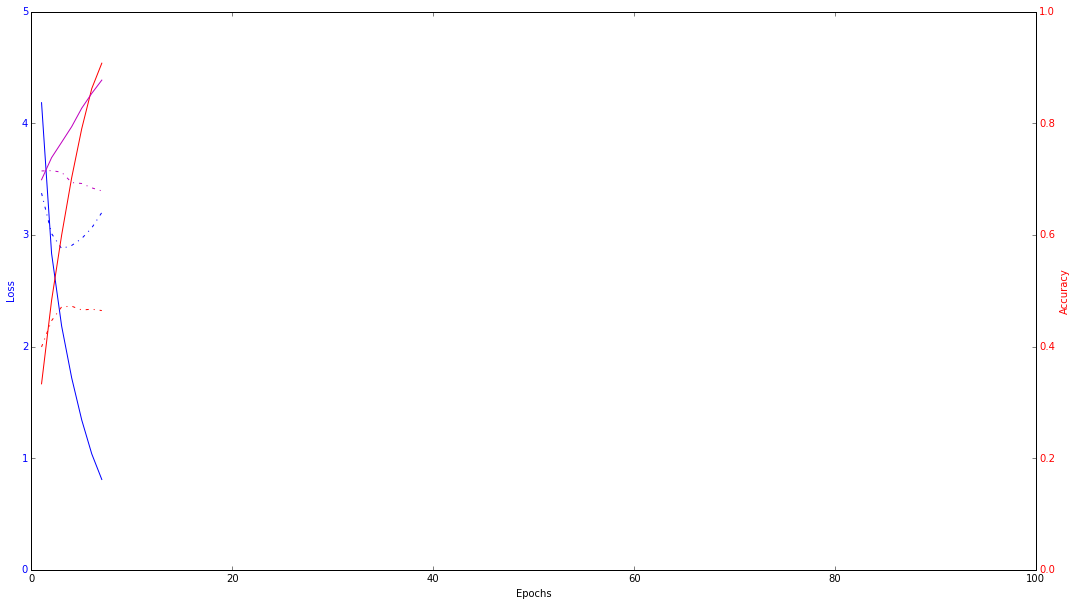

In [14]:
with open('../logs/training_e01.log', 'r') as f:
    txt = f.read()
    
plot_on_training(txt)

# Experiment 2

Added dropout and reduce the network to one LSTM layer for each task.

```
nb_experiment: 2
batch_size: 256
timesteps: 20
epochs: 100
learning rate: 0.0001
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
====================================================================================================
features (InputLayer)            (256, 20, 4096)       0                                            
____________________________________________________________________________________________________
normalization (BatchNormalization(256, 20, 4096)       8192        features[0][0]                   
____________________________________________________________________________________________________
dropout_1 (Dropout)              (256, 20, 4096)       0           normalization[0][0]              
____________________________________________________________________________________________________
lstm_classification (LSTM)       (256, 512)            9439232     dropout_1[0][0]                  
____________________________________________________________________________________________________
lstm_detection (LSTM)            (256, 20, 512)        9439232     dropout_1[0][0]                  
____________________________________________________________________________________________________
dropout_2 (Dropout)              (256, 512)            0           lstm_classification[0][0]        
____________________________________________________________________________________________________
dropout_3 (Dropout)              (256, 20, 512)        0           lstm_detection[0][0]             
____________________________________________________________________________________________________
activity_detection (TimeDistribut(256, 20, 1)          513         dropout_3[0][0]                  
____________________________________________________________________________________________________
class_predictor (Dense)          (256, 201)            103113      dropout_2[0][0]                  
====================================================================================================
Total params: 18990282
____________________________________________________________________________________________________
```

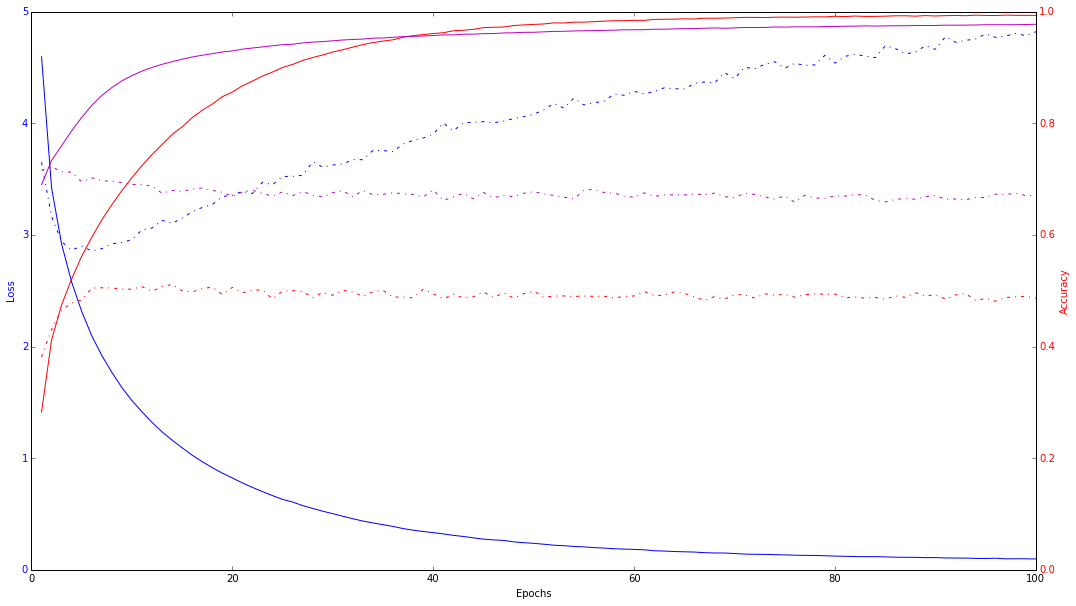

In [22]:
with open('../logs/training_e02.log', 'r') as f:
    txt = f.read()
    
plot_on_training(txt)

# Experiment 3

A stateful network that only predicts whether is happening an activity or not. One LSTM dropout, and `lr=1e-4`.

```
nb_experiment: 3
batch_size: 256
timesteps: 20
epochs: 100
learning rate: 0.0001
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
====================================================================================================
features (InputLayer)            (256, 20, 4096)       0                                            
____________________________________________________________________________________________________
normalization (BatchNormalization(256, 20, 4096)       8192        features[0][0]                   
____________________________________________________________________________________________________
dropout_1 (Dropout)              (256, 20, 4096)       0           normalization[0][0]              
____________________________________________________________________________________________________
lstm1 (LSTM)                     (256, 20, 512)        9439232     dropout_1[0][0]                  
____________________________________________________________________________________________________
dropout_2 (Dropout)              (256, 20, 512)        0           lstm1[0][0]                      
____________________________________________________________________________________________________
activity_detection (TimeDistribut(256, 20, 1)          513         dropout_2[0][0]                  
====================================================================================================
Total params: 9447937
____________________________________________________________________________________________________
Model Compiled!
```

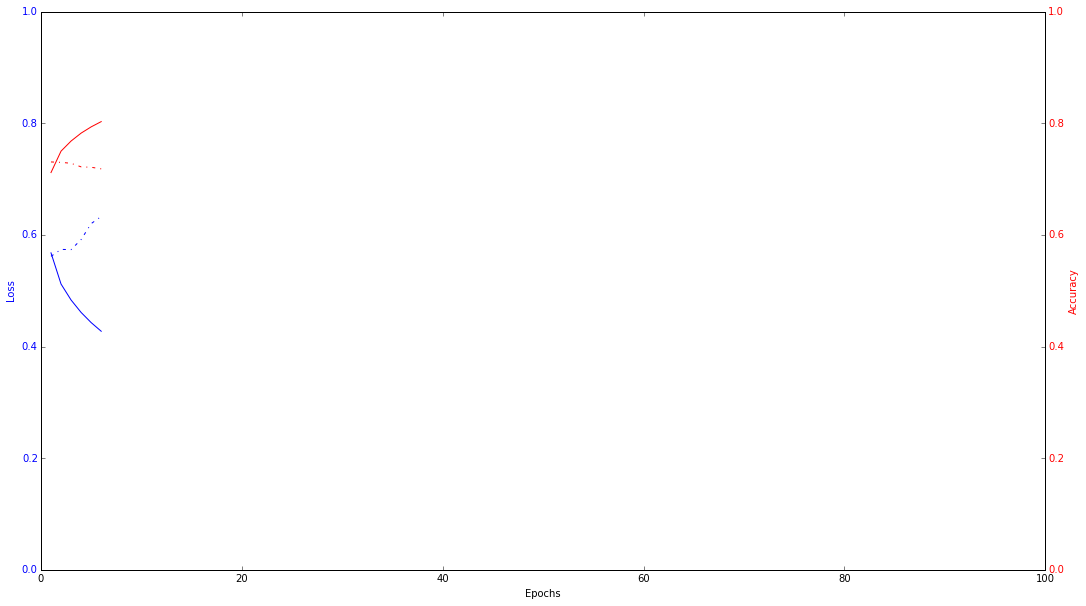

In [11]:
with open('../logs/training_e03.log', 'r') as f:
    txt = f.read()
    
plot_on_training(txt, max_loss=1)

Stop because the increassing validation loss. Proposed solution: reduce learning rate to 1e-5.

# Experiment 4

The same as experiment 3 but with `lr=1e-5`.

```
nb_experiment: 4
batch_size: 256
timesteps: 20
epochs: 100
learning rate: 1e-05
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
====================================================================================================
features (InputLayer)            (256, 20, 4096)       0                                            
____________________________________________________________________________________________________
normalization (BatchNormalization(256, 20, 4096)       8192        features[0][0]                   
____________________________________________________________________________________________________
dropout_1 (Dropout)              (256, 20, 4096)       0           normalization[0][0]              
____________________________________________________________________________________________________
lstm1 (LSTM)                     (256, 20, 512)        9439232     dropout_1[0][0]                  
____________________________________________________________________________________________________
dropout_2 (Dropout)              (256, 20, 512)        0           lstm1[0][0]                      
____________________________________________________________________________________________________
activity_detection (TimeDistribut(256, 20, 1)          513         dropout_2[0][0]                  
====================================================================================================
Total params: 9447937
____________________________________________________________________________________________________
```

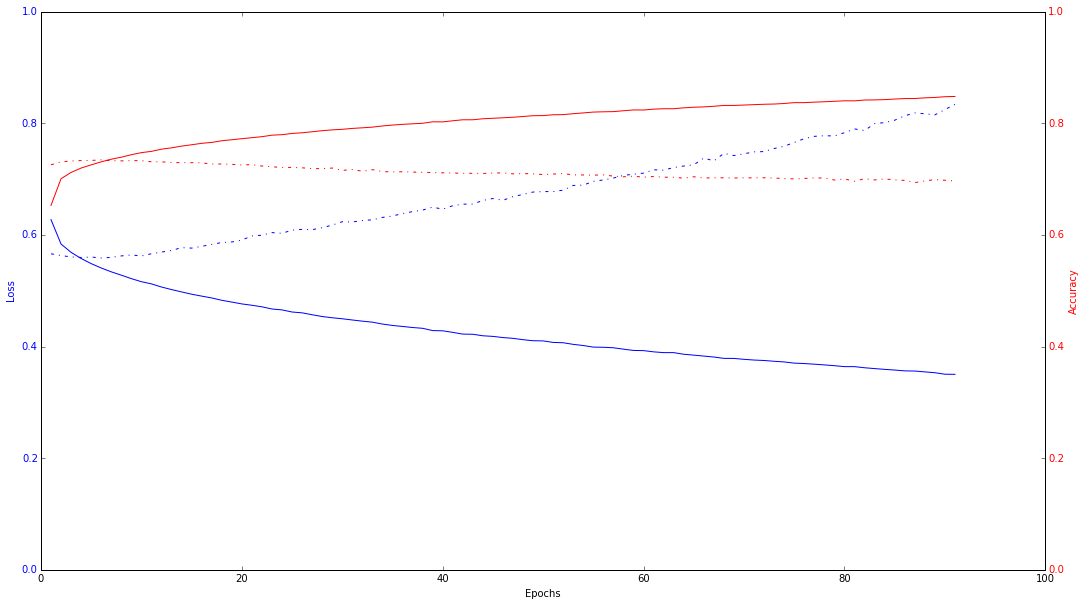

In [20]:
with open('../logs/training_e04.log', 'r') as f:
    txt = f.read()
    
plot_on_training(txt, max_loss=1)

# Experiment 5

The same as experiment 4 but decreasing the number of neurons to 256.

```
nb_experiment: 5
batch_size: 256
timesteps: 20
epochs: 100
learning rate: 1e-05
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
====================================================================================================
features (InputLayer)            (256, 20, 4096)       0                                            
____________________________________________________________________________________________________
normalization (BatchNormalization(256, 20, 4096)       8192        features[0][0]                   
____________________________________________________________________________________________________
dropout_1 (Dropout)              (256, 20, 4096)       0           normalization[0][0]              
____________________________________________________________________________________________________
lstm1 (LSTM)                     (256, 20, 256)        4457472     dropout_1[0][0]                  
____________________________________________________________________________________________________
dropout_2 (Dropout)              (256, 20, 256)        0           lstm1[0][0]                      
____________________________________________________________________________________________________
activity_detection (TimeDistribut(256, 20, 1)          257         dropout_2[0][0]                  
====================================================================================================
Total params: 4465921
____________________________________________________________________________________________________
```

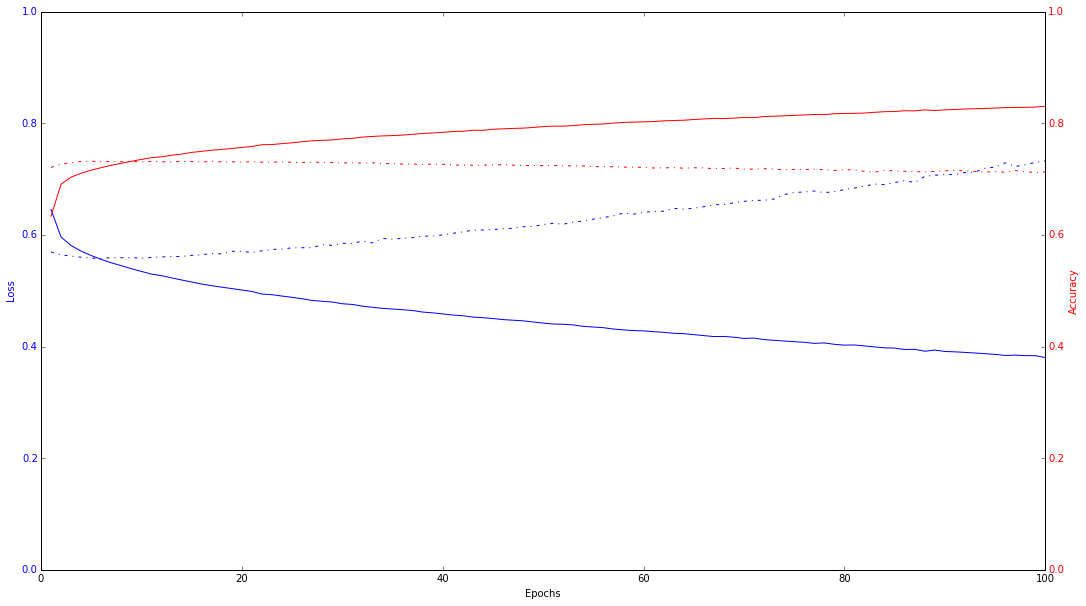

In [22]:
with open('../logs/training_e05.log', 'r') as f:
    txt = f.read()
    
plot_on_training(txt, max_loss=1)

# Experiment 6

Same as experiment 4, but removing the normalization and `lr=1e-6`

```
nb_experiment: 6
batch_size: 256
timesteps: 20
epochs: 200
learning rate: 1e-06
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
====================================================================================================
features (InputLayer)            (256, 20, 4096)       0                                            
____________________________________________________________________________________________________
normalization (BatchNormalization(256, 20, 4096)       8192        features[0][0]                   
____________________________________________________________________________________________________
dropout_1 (Dropout)              (256, 20, 4096)       0           normalization[0][0]              
____________________________________________________________________________________________________
lstm1 (LSTM)                     (256, 20, 256)        4457472     dropout_1[0][0]                  
____________________________________________________________________________________________________
activity_detection (TimeDistribut(256, 20, 1)          257         lstm1[0][0]                      
====================================================================================================
Total params: 4465921
____________________________________________________________________________________________________
```

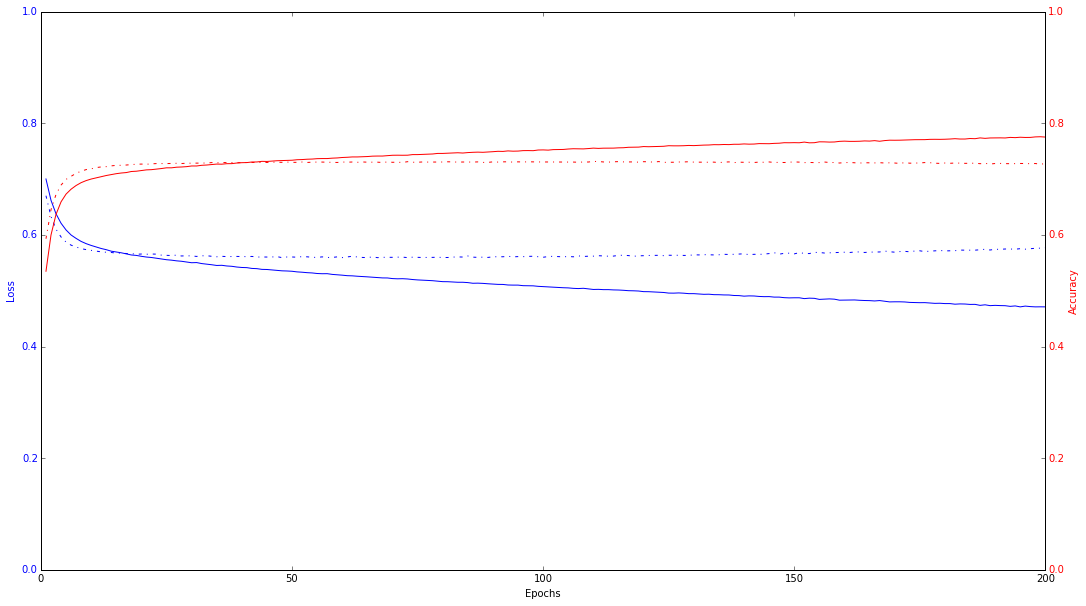

In [44]:
with open('../logs/training_e06.log', 'r') as f:
    txt = f.read()
    
plot_on_training(txt, max_epochs=200, max_loss=1)